# STUDENT ALCOHOL CONSUMPTION
### DATASET ANALYSIS

___

#### CONTEXT:
(*from source*)
> The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade.

#### DATASET:
[Student Alcohol Consumption](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption?select=student-merge.R)

### FEATURE REFERENCE TABLE
Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

1. **school** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. **sex** - student's sex (binary: 'F' - female or 'M' - male)
3. **age** - student's age (numeric: from 15 to 22)
4. **address** - student's home address type (binary: 'U' - urban or 'R' - rural)
5. **famsize** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. **Pstatus** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. **Medu** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. **Fedu** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. **Mjob** - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. **Fjob** - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. **reason** - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. **guardian** - student's guardian (nominal: 'mother', 'father' or 'other')
13. **traveltime** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. **studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. **failures** - number of past class failures (numeric: n if 1<=n<3, else 4)
16. **schoolsup** - extra educational support (binary: yes or no)
17. **famsup** - family educational support (binary: yes or no)
18. **paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. **activities** - extra-curricular activities (binary: yes or no)
20. **nursery** - attended nursery school (binary: yes or no)
21. **higher** - wants to take higher education (binary: yes or no)
22. **internet** - Internet access at home (binary: yes or no)
23. **romantic** - with a romantic relationship (binary: yes or no)
24. **famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. **freetime** - free time after school (numeric: from 1 - very low to 5 - very high)
26. **goout** - going out with friends (numeric: from 1 - very low to 5 - very high)
27. **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. **health** - current health status (numeric: from 1 - very bad to 5 - very good)
30. **absences** - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

1. **G1** - first period grade (numeric: from 0 to 20)
2. **G2** - second period grade (numeric: from 0 to 20)
3. **G3** - final grade (numeric: from 0 to 20, output target)

*Additional note: there are several (382) students that belong to both datasets .
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.*


In [17]:
import pandas as pd
from pandas.plotting import table
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from importlib import reload
import math
import time
from pandas.core.common import SettingWithCopyWarning, warnings

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
# local files



plots = []

# PART 1
___

In [18]:
raw_student_data_math = pd.read_csv('datasets\\student-mat.csv')
raw_student_data_por = pd.read_csv('datasets\\student-por.csv')

df_math = pd.DataFrame(raw_student_data_math)
df_por = pd.DataFrame(raw_student_data_por)

In [19]:
# check for any missing values
df_math.isnull().values.any()

False

In [20]:
len(df_math), len(df_por)
#

(395, 649)

In [21]:
# preview math data
df_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [22]:
df_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


# PART 1A
### SEX
___

As of 2020, men make up 50.4% of the world population, while women make up 49.6%. Let's explore whether this is also descriptive of our data or not.

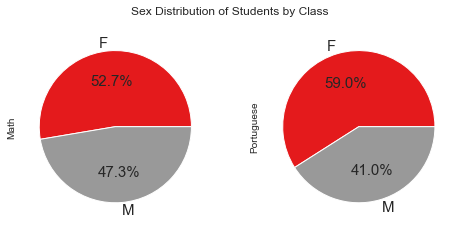

In [23]:
# get dist of sex among all students
agg_sex_data = pd.DataFrame(data=df_math['sex'].value_counts())
agg_sex_data = agg_sex_data.rename(columns={'sex': 'Math'})
agg_sex_data['Portuguese'] = df_por['sex'].value_counts().values
pie1 = agg_sex_data.sort_index(axis=0).plot(kind='pie', title='Sex Distribution of Students by Class', subplots=True, legend=False, figsize=(8,3.5), autopct='%1.1f%%', startangle=0, fontsize=15, colormap='Set1')


We can see that there are more women than men in both classes, though the split is more even within the Math class.

*Does this trend of female majority hold for each school?*

In [28]:
# split data by school ('GP' and 'MS')
gp_students = df_por.loc[df_por['school'] == 'GP']
ms_students = df_por.loc[df_por['school'] == 'MS']

gp_sex_ratio = gp_students['sex'].value_counts()
ms_sex_ratio = ms_students['sex'].value_counts()

# aggregate sex data and plot
pd.merge(gp_sex_ratio, ms_sex_ratio, left_index=True, right_index=True, suffixes=['_GP', '_MS'])
# pie2 = agg_sexes_by_school.plot(kind='pie', grid=False, title='Sex Distribution by School', subplots=True, autopct='%1.1f%%', startangle=0, fontsize=15, legend=False, figsize=(8,3.5), colormap='Spectral')

# plt.savefig('figures\\sex_dist_by_school.png', dpi=300)

,sex_GP,sex_MS
F,237,146
M,186,80


array([<AxesSubplot:ylabel='Math'>, <AxesSubplot:ylabel='Portuguese'>],
      dtype=object)

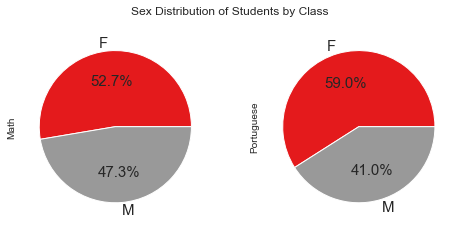

In [29]:
# compare results with previous chart
agg_sex_data.sort_index(axis=0).plot(kind='pie', title='Sex Distribution of Students by Class', subplots=True, legend=False, figsize=(8,3.5), autopct='%1.1f%%', startangle=0, fontsize=15, colormap='Set1')

# plt.savefig('figures\\sex_dist_by_class.png', dpi=300)

We can see that both schools contain more female than male students. If taking Math were required of all students at these schools, we should observe women making up between 56-64.6% of all math students roughly, but this is not the case. Note that this holds for the portuguese students. On the other hand, the proportion of male math students is greater than that of male students at either school. Therefore, some potential explanations for this may be:

- math is not a requirement, and women are less likely to enroll
- math is not a requirement, and men are more likely to enroll
- math is required, but some other factor (not described in the dataset) is responsible for this discrepancy

# PART 1B
### AGE
___

Math students age 15-19: 98.73%
Portuguese Language students age 15-19: 98.61%


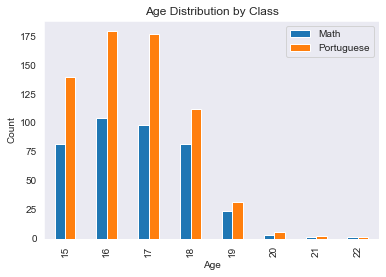

In [30]:
# get age dist among all students
agg_age_data = pd.DataFrame(data=df_math['age'].value_counts().sort_values(ascending=False))
agg_age_data = agg_age_data.rename(columns={'age': 'Math'})
agg_age_data['Portuguese'] = df_por['age'].value_counts().values

gruped_bar1 = agg_age_data.sort_index(axis=0).plot(kind='bar', grid=False, title='Age Distribution by Class', xlabel='Age').set(ylabel='Count')

# plt.figure(figsize=(10, 10))

num_math_students = agg_age_data['Math'].sum()
age_range_15_to_19_math = round(((num_math_students - agg_age_data['Math'].loc[20:22].sum()) / num_math_students) * 100, 2)
num_por_students = agg_age_data['Portuguese'].sum()
age_range_15_to_19_por = round(((num_por_students - agg_age_data['Portuguese'].loc[20:22].sum()) / num_por_students) * 100, 2)

print(f"Math students age 15-19: {age_range_15_to_19_math}%")
print(f"Portuguese Language students age 15-19: {age_range_15_to_19_por}%")
agg_age_data.sort_index(axis=0)

plt.savefig('figures\\age_dist_by_class.png', dpi=300)

As expected, since most of the math students are contained in the portuguese class data, we see that the distribution of ages is similar between both. The majority of students are in the age range 15-19 (~98%).

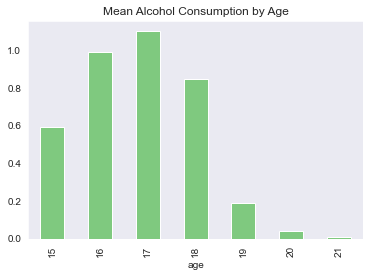

In [31]:
# find alc consumption by age
age_bins = []
sums = []
ages = df_por['age'].value_counts().keys().sort_values(ascending=True).to_list()
[age_bins.append([age, []]) for age in ages]
[sums.append(0) for i in ages]

alc_cons_by_age = df_por[['age', 'Dalc', 'Walc']]
alc_cons_by_age['Talc'] = alc_cons_by_age['Walc'] + alc_cons_by_age['Dalc']
alc_cons_by_age.sort_values(by='age', inplace=True, ascending=True)
alc_cons_by_age.reset_index(inplace=True)
alc_cons_by_age = alc_cons_by_age[['age', 'Talc']]

# find mean alc cons for each age
# sum Talc for all students of each age, divide sums by number of students
for i, age in enumerate(ages):
    for j, row in alc_cons_by_age.iterrows():
        if row['age'] == age:
            age_bins[i][1].append(row['Talc'])
    sums[i] = sum(age_bins[i][1])

for i, s in enumerate(sums):
    age = age_bins[i][0]
    # num_of_students = agg_age_data.loc[age][1]
    age_bins[i][1] = round(sums[i] / len(alc_cons_by_age), 2)

alc_cons_by_age_data = pd.DataFrame(data=age_bins[:-1], columns=['age', 'Malc'])
bar1 = alc_cons_by_age_data.plot(kind='bar', title='Mean Alcohol Consumption by Age', legend=False, x='age', y='Malc', colormap='Accent', grid=False)
# alc_cons_by_age_data

# plt.savefig('figures\\rel_alc_cons.png', dpi=300)

By calculating the mean of each age's weekly alcohol consumption, we find that proportionally, 17-year-olds consume the most alcohol on average within the dataset. Relatively speaking, even the 17-year-old age group's mean of 1.1 is still considered *very low* on the scale posed by the dataset creator.

Note that this visualization is only meant to compare the consumption habits of age groups *relative to each other* (within this dataset). For example, the dataset contains only a handful students older than 19, hence their consumption habits will appear lower in comparison.

# PART 1C
### LOCATION
___

Location data can tell us important information about the type of area the schools are located in. For example, if a majority of students live in an urban location, the school is likely in an urban area, or at least close to one. This would be similar for rural schools.

(226, 423)

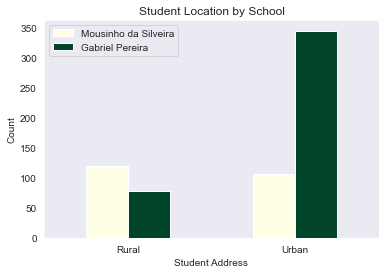

In [93]:
fig, ax = plt.subplots()

location_data = df_por[['school', 'address', 'traveltime', 'Pstatus']]

loc_data_gp = location_data.loc[location_data['school'] == 'GP']
loc_data_ms = location_data.loc[location_data['school'] == 'MS']

addresses_gp = pd.DataFrame(loc_data_gp['address'].value_counts())
addresses_ms = pd.DataFrame(loc_data_ms['address'].value_counts())

addresses_by_school = addresses_ms.merge(addresses_gp, left_index=True, right_index=True, suffixes=['_MS', '_GP'])
# location_data['address'].value_counts()

addresses_by_school.plot(kind='bar', title='Student Location by School', grid=False, rot=0, colormap='YlGn', xlabel='Student Address', ylabel='Count', ax=ax)
plt.xticks([0, 1], ['Rural', 'Urban'])
ax.legend(['Mousinho da Silveira', 'Gabriel Pereira'])
# ax.legend(['Mousinho da Silveira', 'Gabriel Pereira'])
# sns.barplot()
addresses_ms.address.sum(), addresses_gp.address.sum()
# plt.savefig('figures\\student_loc_by_school.png', dpi=300)


It's intuitive that a rural school would mostly contain students from rural areas, and that urban schools mostly contain students from urban areas. Alternatively, a school located in a suburb would have a mix of both kinds of students.


Based on the figure and points above, we can see that **Mousinho da Silveira** is likely in a **suburban** area, given that it has a roughly even distribution of students from both kinds of areas.

Whereas, **Gabriel Pereira** is mostly made up of students from urban areas, implying it is likely located **near or within a city**.

It is also true that GP has nearly twice as many students as MS, which further supports the hypothesis that GP is a city school, and MS is a suburban school.
In terms of MS student commute times, we should find a more varied distribution than that of students at GP, because the location of these students varies more overall. The commute times of students at GP should be more skewed because we found that roughly 2/3 of its student population to be located in urban areas.

In [150]:
# get travel time distribution, sort by school
commute_times = location_data.loc[:, ['school', 'traveltime']]
commutes_gp = commute_times.loc[commute_times['school'] == 'GP']
commutes_ms = commute_times.loc[commute_times['school'] == 'MS']

Recall that:
>**traveltime** - home to school travel time
1 - <15 min.
2 - 15 to 30 min.
3 - 30 min. to 1 hour
4 - >1 hour

(0.9267139479905437, 0.9778761061946902)

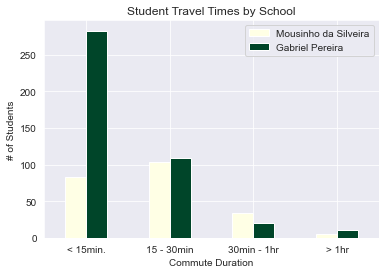

In [171]:
fig1, ax = plt.subplots()
time_lengths = ['< 15min.', '15 - 30min', '30min - 1hr', '> 1hr']

ms_traveltimes = pd.DataFrame(commutes_ms['traveltime'].value_counts().sort_index(ascending=True))
gp_traveltimes = pd.DataFrame(commutes_gp['traveltime'].value_counts().sort_index(ascending=True))


agg_traveltimes = ms_traveltimes.merge(gp_traveltimes, left_index=True, right_index=True, suffixes=['_MS', '_GP'])
# plot graph
agg_traveltimes.plot(kind='bar', rot=0, title='Student Travel Times by School', ylabel='# of Students', xlabel='Commute Duration', colormap='YlGn', grid=True, ax=ax)
plt.xticks([0, 1, 2, 3], time_lengths) # relabel x ticks
ax.legend(['Mousinho da Silveira', 'Gabriel Pereira']) # relabel legend

agg_traveltimes['traveltime_GP'][:2].sum() / agg_traveltimes['traveltime_GP'].sum(), agg_traveltimes['traveltime_MS'][:3].sum() / agg_traveltimes['traveltime_MS'].sum()

# plt.savefig('figures\\student_traveltime_by_school.png', dpi=300)

As expected, the data mostly supports our claims from the previous graph. Approximately 93% of students attending GP have a commute time less than or equal to 30 minutes, whereas 83% of students at MS have a 30 minute (or less) commute time.

*(98% of students attending MS have a commute time of less than or equal to an hour)*

In [172]:
gp_traveltimes = pd.DataFrame(commutes_gp['traveltime'].value_counts().sort_index(ascending=True))
gp_traveltimes

,traveltime
1,283
2,109
3,20
4,11


 # PART 1D
### FAMILIAL/ECONOMIC STATUS
___

*Do a student's familial circumstances affect their school performance?*

Features that could affect familial circumstances:
- **famsize**: how big a student's family is
- **Pstatus**: whether a student lives with their family or not
- **Medu**, **Mjob**, **Fedu**, **Fjob**: parent's education level, job type (implies family economic status, if student is not estranged from family)
- **guardian**: student's guardian (implies student's Pstatus)
- **famsup**: whether a student's family supports their education or not
- **nursery**: whether a student went to nursery school or not (implies family economic status)
- **famrel**: a student's relationship to their family (higher = better)
- **paid**: if a student took extra-coursework (implies family economic status)
- **internet**: whether student has internet access (implies family economic status, if they live with family)

#### Sub-Tasks:
Do parents with higher education levels have children with higher grades?
Do more supportive families yield children with higher grades?


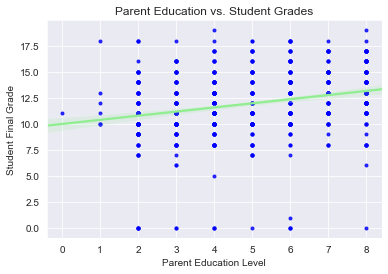

In [33]:
# gather data on parents
parents_data = df_por[['Medu', 'Mjob', 'Fedu', 'Fjob', 'G3']]
# compute parents' education level
parents_data['Pedu'] = parents_data['Medu'] + parents_data['Fedu']

parents_education_grades = parents_data[['Pedu', 'G3']]
# parents_education_grades.plot(kind='scatter', x='Pedu', y='G3', grid=False, title="Parent Education vs. Student Grades")
regplot = sns.regplot(data=parents_education_grades, x='Pedu', y='G3', scatter_kws={'color': 'blue'}, line_kws={'color': 'lightgreen'}, truncate=False, marker='.').set(title='Parent Education vs. Student Grades', xlabel='Parent Education Level', ylabel='Student Final Grade', )

# plt.savefig('figures\\parent_edu_vs_student_grades.png', dpi=300)

We observe a weak, but positive relationship between parental education and a student's grades. It could be that there is more data for students with parents who are more highly-educated than not. And we find that every parental education group contains at least 1 student that scores highly (>17.5/20). It seems that a student's parents' education does play a role in their grades, albeit to a small degree.

___
#### PARENTAL DEMOGRAPHICS

In [34]:
parent_data = df_por[['Mjob', 'Medu', 'Fjob', 'Fedu', 'guardian', 'famsup', 'G3']]
parent_data

,Mjob,Medu,Fjob,Fedu,guardian,famsup,G3
0,at_home,4,teacher,4,mother,no,11
1,at_home,1,other,1,father,yes,11
2,at_home,1,other,1,mother,no,12
3,health,4,services,2,mother,yes,14
4,other,3,other,3,father,yes,13
...,...,...,...,...,...,...,...
644,services,2,other,3,mother,no,10
645,teacher,3,services,1,mother,yes,16
646,other,1,other,1,mother,no,9
647,services,3,services,1,mother,no,10


In [35]:
labels = ['None', 'Middle School', 'Secondary', 'College']

medu = parent_data['Medu'].value_counts().sort_index(ascending=True)
fedu = parent_data['Fedu'].value_counts().sort_index(ascending=True)
medu1 = pd.DataFrame(medu)
fedu2 = pd.DataFrame(fedu)
parent_edu = medu1.merge(fedu2, left_index=True, right_index=True)
parent_edu['Mperc'] = (round(parent_edu['Medu'] / 1298, 2))
parent_edu['Fperc'] = (round(parent_edu['Fedu'] / 1298, 2))
parent_edu_ = parent_edu[['Mperc', 'Fperc']]
parent_edu = parent_edu[['Medu', 'Fedu']]
parent_edu_
# parent_edu['Medu'].sum() + parent_edu['Fedu'].sum()

,Mperc,Fperc
0,0.00,0.01
1,0.11,0.13
2,0.14,0.16
3,0.11,0.10
4,0.13,0.10


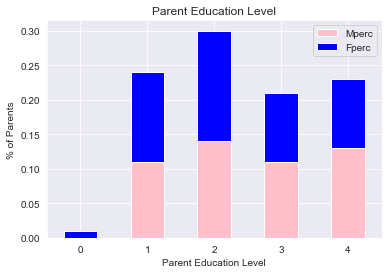

In [36]:
grouped_bar2 = parent_edu_.plot(kind='bar', stacked=True, color=['pink', 'blue'], title='Parent Education Level', xlabel='Parent Education Level', ylabel='% of Parents', rot=0)

# plt.savefig('figures\\parent_edu1.png', dpi=300)

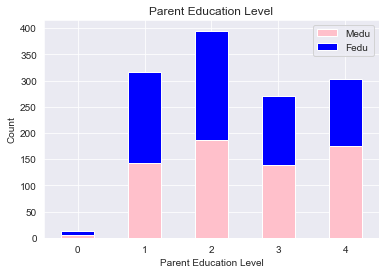

In [37]:
grouped_bar3 = parent_edu.plot(kind='bar', stacked=True, color=['pink', 'blue'], title='Parent Education Level', xlabel='Parent Education Level', ylabel='Count', rot=0)

# plt.savefig('figures\\parent_edu2.png', dpi=300)

Based on the graph above, nearly all parents have some level of education, although less than 55% of parents are not high school educated, and less than 25% of parents are college graduates. Given that roughly 86% of US household heads have a college degree, it is fair to assert that the demographic of this school data is low-income or in a developing nation.

Furthermore, the fact that the number of parents with a 4-year degree is greater than those with just a diploma may imply these parents are first-generation college graduates.

**NOTE:** The dataset does not specify the whether the parents are alive, though based on the guardian field for each student, we can surmise the status of at least one of the parents.

In [38]:
parent_jobs = parent_data[['Mjob', 'Fjob']]
mjobs = pd.DataFrame(parent_jobs['Mjob'].value_counts())
fjobs = pd.DataFrame(parent_jobs['Fjob'].value_counts())
parents_jobs = mjobs.merge(fjobs, left_index=True, right_index=True)
parents_jobs

,Mjob,Fjob
other,258,367
services,136,181
at_home,135,42
teacher,72,36
health,48,23


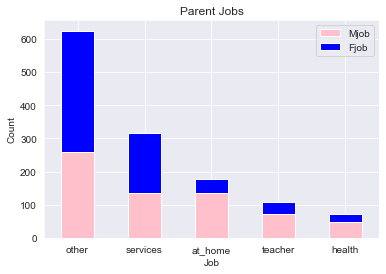

In [39]:
grouped_bar4 = parents_jobs.plot(kind='bar', stacked=True, color=['pink', 'blue'], title='Parent Jobs', xlabel='Job', ylabel='Count', rot=0)

# plt.savefig('figures\\parent_jobs.png', dpi=300)

The above graph displays some interesting pieces of information. As to be expected, mothers make up a greater proportion of service workers, teachers, and health workers than fathers do.

We cannot say much more about on this due to a lack of specificity of the "at home job" and "other" columns, which makes up the majority of this data.

In [40]:
parent_data['guardian'].value_counts()

mother    455
father    153
other      41
Name: guardian, dtype: int64

In [ ]:
 # # split df by sexes
# female_data = df_por.loc[df_por['sex'] == 'F']
# male_data = df_por.loc[df_por['sex'] == 'M']
#
# # isolate alcohol consumption data for each
# # Talc (Total alcohol consumption) = Dalc + Walc
# female_alc_cons = female_data[['Dalc', 'Walc']]
# female_alc_cons['Talc'] = female_data['Walc'] + female_data['Dalc']
# male_alc_cons = male_data[['Dalc', 'Walc']]
# male_alc_cons['Talc'] = male_data['Walc'] + male_data['Dalc']
#
# # sum all student Talc values for each sex & divide by number of students of each sex
# avg_female_alc_cons = female_alc_cons['Talc'].sum() / len(female_alc_cons)
# avg_male_alc_cons = male_alc_cons['Talc'].sum() / len(male_alc_cons)
#
# # display results
# print(f"Total Male Alcohol Consumption: {round(avg_male_alc_cons, 2)}")
# print(f"Total Female Alcohol Consumption: {round(avg_female_alc_cons, 2)}")
# avg_male_alc_cons > avg_female_alc_cons

In [ ]:
# sex_grades = raw_student_data_por[['sex', 'G3']]
# # ignore outliers
# sex_grades = sex_grades.loc[sex_grades['G3'] > 5]
# sns.catplot(data=sex_grades, x='sex', y='G3', kind='swarm', hue='sex', s=2.25).set(title='Grade Distributions by Sex', ylabel='Grade', xlabel='Sex')

In [ ]:
raw_student_data_por['Talc'] = raw_student_data_por['Dalc'] + raw_student_data_por['Walc']

total_alc = raw_student_data_por['Talc']

bar2 = sns.barplot(x=total_alc.value_counts().keys(), y=total_alc.value_counts().values).set(title='Student Alcohol Consumption Distribution', xlabel='Weekly Alcohol Consumption', ylabel='Number of Students')

# plt.savefig('figures\\student_alc_cons.png', dpi=300)

In [ ]:
alc_grades = raw_student_data_por[['G3', 'Talc']]
alc_grades = alc_grades.loc[alc_grades['G3'] > 0.0]
alc_grades = alc_grades.sort_values(by='Talc',ascending=True, ignore_index=True)
sns.scatterplot(data=alc_grades, x='Talc', y='G3',).set(title='Alcohol Consumption', xlabel='Weekly Alcohol Consumption', ylabel='Final Grade')

In [ ]:
# absent_grades = df_por[['absences', 'G3']]
# absent_grades = absent_grades.loc[absent_grades['G3'] > 0.0]
# # absent_grades.plot(kind='scatter', x='absences', y='G3')
# scatterplot = sns.regplot(x=absent_grades['absences'], y=absent_grades['G3'], truncate=False)

In [ ]:
# feature correlation heatmap

# plt.figure(figsize=(15, 15))
# sns.heatmap(raw_student_data_math.corr(), annot=True, fmt=".2f", cbar=True)
# plt.xticks(rotation=90)
# plt.yticks(rotation=0)